# 📝 Tarea: Implementación de una Red Neuronal Avanzada (CNN o LSTM)

**Integrantes:**

*   Adrián Bedón
*   Jairo Bedón
*   Andrea Cobos
*   Xavier Ramos

### 🎯 Objetivo

El objetivo de esta actividad es **aplicar un modelo de red neuronal profunda especializado (LSTM o CNN) para resolver un problema de clasificación supervisada**.
Con este ejercicio los estudiantes explorarán arquitecturas más avanzadas que los MLP, enfocadas en **patrones secuenciales** (LSTM) o **patrones espaciales/locales** (CNN), entendiendo su funcionamiento básico y cómo se entrenan en la práctica.

### 📊 Tipo de problema

* **Clasificación supervisada**: el modelo aprende a asignar etiquetas de clase a partir de un conjunto de ejemplos previamente conocidos.
* Dependiendo del dataset elegido, la variable objetivo puede ser:

  * **Binaria** (dos clases, p. ej. positivo/negativo).
  * **Multiclase** (más de dos clases, p. ej. categorías A, B, C…).


### 🔍 Variable objetivo

* Es una **variable categórica**.
* El modelo debe aprender a **predecir la clase correcta** en función de los patrones presentes en los datos (secuencias o imágenes).


### ⚙️ ¿Cómo se modela con LSTM o CNN?

1. **Capa de entrada**

   * Para **LSTM**: los datos se organizan como una **secuencia temporal** (ej. series de valores en el tiempo).
   * Para **CNN**: los datos se organizan en **matrices de características** donde el modelo aprende patrones locales (ej. imágenes, texto representado como embeddings, datos tabulares con estructura).

2. **Capas ocultas**

   * **LSTM**: cada celda mantiene una “memoria” de lo anterior en la secuencia, lo que permite capturar dependencias temporales.
   * **CNN**: aplica **filtros convolucionales** que detectan patrones locales (bordes, formas, repeticiones) y los combinan en niveles superiores.

3. **Capa de salida**

   * Para clasificación binaria: una neurona con activación sigmoide → devuelve una probabilidad entre 0 y 1.
   * Para multiclase: tantas neuronas como clases, con activación softmax → devuelve una distribución de probabilidades sobre las clases.

4. **Función de pérdida**

   * **Binaria**: entropía cruzada binaria.
   * **Multiclase**: entropía cruzada categórica.

5. **Entrenamiento**

   * El modelo ajusta sus parámetros mediante retropropagación.
   * Se trabaja con lotes de datos (mini-batches) y múltiples épocas de entrenamiento.

6. **Evaluación**

   * Matriz de confusión y métricas: accuracy, precision, recall, F1-score.
   * En multiclase, se recomienda también macro/micro promedio de métricas.


### 📂 Dataset

* El dataset dependerá de la modalidad elegida:

  * **LSTM**: usar una **serie temporal** (ejemplo: valores de sensores, secuencias numéricas, texto).
  * **CNN**: usar un dataset de **imágenes** o datos con estructura matricial (ejemplo: MNIST para dígitos escritos a mano).


### 📋 Instrucciones generales

1. Selecciona un dataset adecuado (serie temporal o imágenes).
2. Define el problema de clasificación (binaria o multiclase).
3. Prepara los datos en el formato correcto (secuencias para LSTM, matrices para CNN).
4. Construye y entrena una red LSTM o CNN básica.
5. Evalúa su desempeño con métricas apropiadas.
6. Interpreta los resultados: ¿qué patrones parece haber aprendido? ¿qué limitaciones observas?

## Opción 1 Low-Code: Visualizando el Aprendizaje de una CNN con MNIST

### 🎯 Objetivo

Entrenar una red neuronal convolucional (CNN) para clasificar imágenes de dígitos escritos a mano (MNIST), y visualizar qué características aprende cada capa. Al final, se evaluará el modelo con una matriz de confusión y un reporte de clasificación.

## 📦 Parte 1: Definición y entrenamiento del modelo

In [ ]:
%pip install tensorflow

In [ ]:
# Importamos la base de datos MNIST desde Keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255 # Normalizamos a [0, 1]. El -1 infiere el tamaño del lote de forma automática (toma todo el lote). El 1 es el canal de color (escala de grises).
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


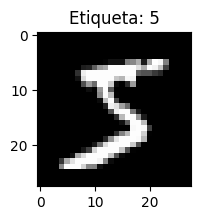

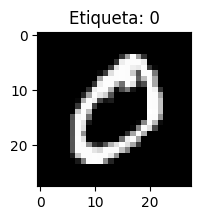

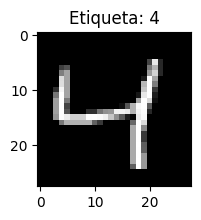

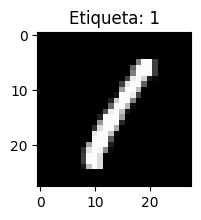

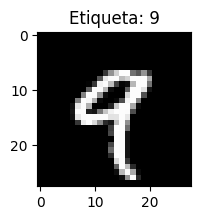

In [ ]:
import matplotlib.pyplot as plt

# Mostramos las primeras 5 imágenes
for i in range(5):
    plt.figure(figsize=(2, 2)) # Tamaño de la figura en pulgadas
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta: {y_train[i]}')
    plt.show()

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers

# Definir la entrada de la red (una imagen de 28x28 en escala de grises)
inputs = Input(shape=(28, 28, 1))   # 👈 CAMBIA AQUÍ alto, ancho, de la imagen

# Primer bloque convolucional: detecta bordes y patrones simples
x = layers.Conv2D(8, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2))(x)  # Reduce la dimensión y conserva lo más relevante

# Segundo bloque convolucional: detecta combinaciones más complejas (curvas, esquinas)
x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Capa densa para clasificación final
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)  # 👈 CAMBIA AQUÍ a 10, clases posibles (0-9)

# Compilar el modelo
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
print(model.summary())

# Entrenar el modelo por 5 épocas
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8495 - loss: 0.5043 - val_accuracy: 0.9795 - val_loss: 0.0771
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9751 - loss: 0.0798 - val_accuracy: 0.9835 - val_loss: 0.0572
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9855 - val_loss: 0.0513
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9868 - loss: 0.0444 - val_accuracy: 0.9857 - val_loss: 0.0488
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9878 - loss: 0.0365 - val_accuracy: 0.9853 - val_loss: 0.0555


### 🧠 Preguntas para reflexionar (Parte 1)

1. ¿Por qué usamos una entrada de tamaño `(28, 28, 1)`? ¿Qué representa cada dimensión?
   - *Se usa esta entrada debido a que se está trabajando con un conjunto de imágenes de dimensiones 28x28 como es MNIST.*
      - *Primera dimensión: Representa la altura de la imagen.*
      - *Segunda dimensión: Representa la anchura de la imagen.*
      - *Tercera dimensión: Representa el número de canales de color de la imagen*
2. En la primera capa convolucional usamos 8 filtros de tamaño 3×3. ¿Qué significan estos filtros?
   - *La cantidad de filtros es la profundidad de salida de la capa, produciendo un mapa de características independiente del cual la red va aprendiendo simultáneamente. Por otro lado, la dimensión de los filtros representa el área local que se observa, en este caso el estándar 3x3 es lo suficientemente pequeño para capturar detalles, pero no tan grande para aumentar la cantidad de cómputo.*
3. ¿Qué efecto tiene `MaxPooling2D` sobre la salida de la convolución?
   - *Reduce el muestreo de los mapas de características.*
4. ¿Por qué la última capa tiene 10 neuronas y qué significa la función `softmax` en este contexto?
   - *Cada una de las neuronas corresponde a las 10 clases de dígitos en los cuales se pueden clasificar las imágenes, usando la función softmax para definir la probabilidad de coincidir con ese dígito.*
5. Observa el `model.summary()` y explica:

   * ¿Cómo cambia el tamaño del tensor a lo largo de las capas?
      - *El tensor cambia de la siguiente manera:*
      * *Convolusionales: Salida = Entrada - Filtro + 1 (Ej. __28 - 3 + 1 = 26__)*
      * *Pooling: Salida = Entrada/2 (Ej, __26/2 = 13__)*
      * *Capa Densa: Se toma el útlimo vector tridimensional __(Alto, Ancho, Canal de Colores)__ y se lo convierte en un vector unidimensional (Ej. __(5,5,16) = 5 x 5 x 16 = 400__)*
   * ¿Por qué disminuyen las dimensiones espaciales?
      - *Disminuyen debido a las capas convolusionales, pues tienen menos posiciones para centrar el filtro en los bordes y por otro lado las capas de pooling, reducen las dimensiones a la mitad pues esto significa menos cálculos para las capas subsiguientes.*
   * ¿Por qué aumenta el número de filtros?
      - *Aumenta debido a la necesidad de capturar más detalles dentro de las imágenes.*

## 🔍 Parte 2: Visualización de mapas de activación

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


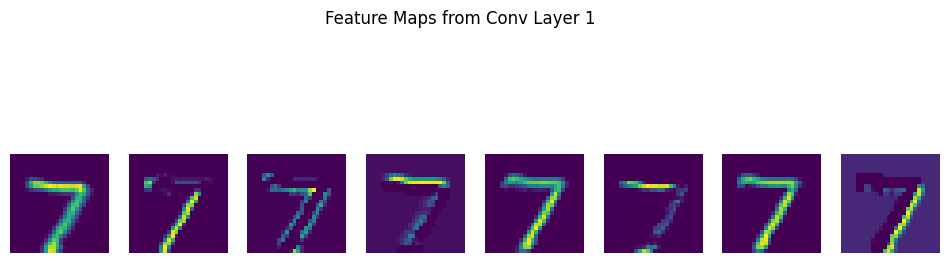

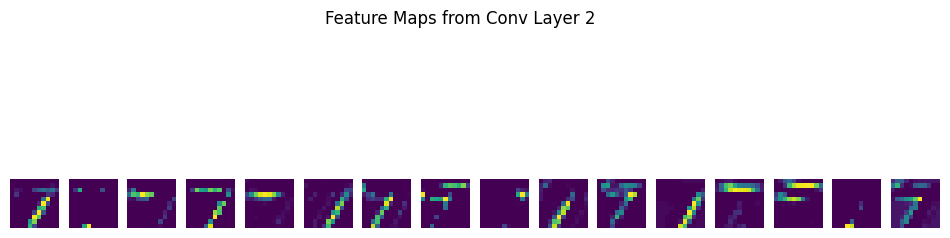

In [ ]:
# Seleccionar una imagen del conjunto de prueba
img = x_test[0:1]

# Crear un modelo que devuelva las salidas intermedias de las capas convolucionales
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtener los mapas de características
feature_maps = feature_model.predict(img)

# Visualizar los mapas de cada capa
import matplotlib.pyplot as plt

for i, fmap in enumerate(feature_maps):
    num_filters = fmap.shape[-1]
    plt.figure(figsize=(12, 4))
    for j in range(num_filters):
        plt.subplot(1, num_filters, j+1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps from Conv Layer {i+1}")
    plt.show()

### 🧠 Pregunta (Parte 2)

 Describe lo que observas en los mapas de características:

 * ¿La primera capa detecta bordes o contornos?
    - *La primera capa detecta bordes pues trata de distinguir las variaciones de intensidad de los píxeles para posteriormente formar contornos.*
 * ¿La segunda capa comienza a detectar formas más complejas como bucles o esquinas?
    - *Si, esto permite que los dígitos de la base MNIST empiecen a ser identificables para las siguientes capas de la red neuronal.*
 * ¿Qué tanto se reduce la imagen con las capas de `MaxPooling`?
    - *Las capas de `MaxPooling` reducen la imagen a la mitad con la finalidad de reducir los cálculos en las siguientes capas y retienen la información más importante.*

## 📊 Parte 3: Evaluación del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


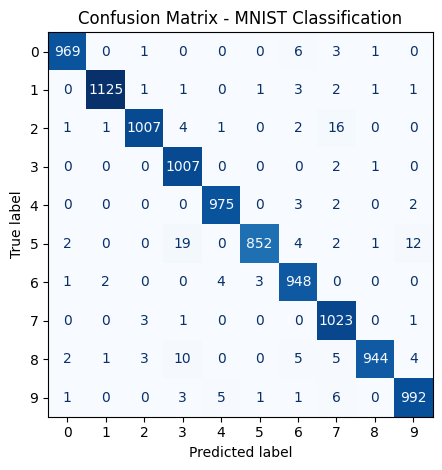

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      1.00      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Predecir clases
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir probabilidades en etiquetas

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap='Blues',
    colorbar=False,
    display_labels=np.arange(10)
)
plt.title("Confusion Matrix - MNIST Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

# Reporte de métricas por clase
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

### 🧠 Preguntas (Parte 3)

1. ¿Qué dígitos fueron más fáciles de clasificar?
    - *La variable recall nos indica que porcentaje de los identificados fueron correctos y, por diferencia, que porcentaje fue mal identificado. Bajo esta métrica los dígitos más fáciles de clasificar fueron el 3 y el 7 aunque podríamos confundirnos con la variable precision donde podemos ver que el 1 y el 8 tuvieron la mejor precision.*
2. ¿Dónde se cometieron más errores? ¿En qué clases?
    - *Tomando en cuenta la misma variable de recall, podemos observar que los dígitos 3 y 7 presentan los valores más bajos, por lo tanto son los que tienen mayores errores al momento de clasificar.*
3. ¿Qué métrica destacarías en el reporte (`precision`, `recall`, `f1-score`) y por qué?
    - *Destacaría la métrica de ***recall*** por lo ya antes explicado, nos muestra que porcentaje de veracidad tenemos al momento de clasificar un dígito que para este caso es lo más importante al momento de clasificar imágenes, y nos apoyaríamos en **f1-score** para saber en que clase podría hacer falta entrenamiento al modelo.*